# Baseline Development - Energy of Cadmium

This journal documents the calculations for the energy of refining cadmium for CdTe PV. The Energy of extraction is calculated separately of the energy of manufacturing. Extraction includes mining and initial processing. Energy of manufacturing covers refining, purification, and incorporation into the semiconductor CdTe. Because Cd is a secondary product of zinc, e_mat_extractin will be zinc mining energy. Additionally, energies associated with refining zinc will be included in Cd energy as necessary steps on the way to cadmium purification. The manufacturing energy includes a % fuel contribution.

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

In [4]:
cwd = os.getcwd() #grabs current working directory
print(cwd)

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\baseline development documentation


#### Mining Energy
See the Supporting Materials Folder, input-energy-CdTe-ZnCdMining.csv for the collected data. Based on the numbers, and notes/caveats, a value of 2.0 kWh/kg was assumed for e_mat_extraction.

#### Manufacturing Energy

In [53]:
skipcols = ['Source', 'Notes']
e_ZnRefine_raw = pd.read_csv(os.path.join(supportMatfolder, "input-energy-CdTe-ZnRefining.csv"), index_col='year')
                           #, usecols=lambda x: x not in skipcols)
e_CdRefine_raw = pd.read_csv(os.path.join(supportMatfolder, "input-energy-CdTe-CdRefining.csv"), index_col='year')
                           #, usecols=lambda x: x not in skipcols)

In [54]:
e_ZnRefine_raw.dropna(how='all')

,E_MFG_Zn_Purify_Cd_[kWh/kg],prct_Fuel,Source,Notes
year,,,,
2008,2.80000,NaN,"Parada T, F., and E. Asselin. “Reducing Power ...","just electrowinning of Zn, 75% higher than the..."
2009,5.33330,67.0,"Fthenakis, Vasilis, Wenming Wang, and Hyung Ch...","Table 5, Smelting/refining, electricity+methan..."
2010,2.94737,NaN,"Rinne, Marja, Petteri Halli, Jari Aromaa, and ...","supplemental, Electrowinning scaled by overpot..."
2023,8.40000,27.0,"Rinne, Marja, Petteri Halli, Jari Aromaa, and ...","Table S3(Kiln+refining), avg, electricity+methane"


Text(0.5, 1.0, 'E_MFG_Zn_Purify_Cd_[kWh/kg]')

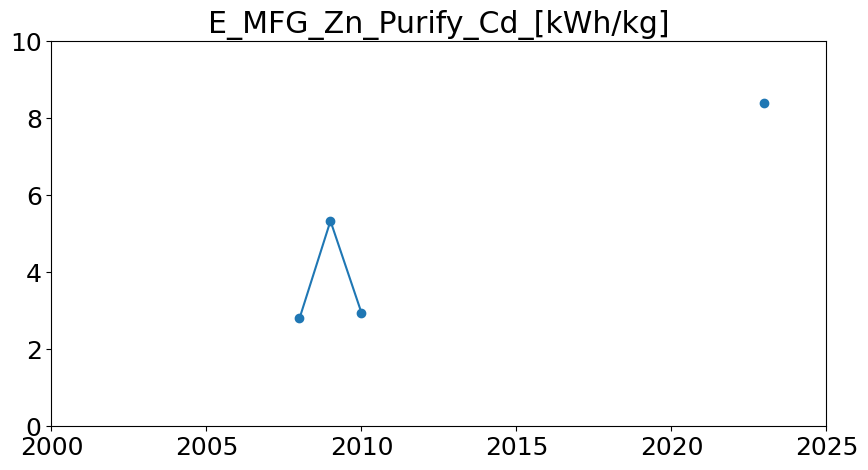

In [55]:
plt.plot(e_ZnRefine_raw.index, e_ZnRefine_raw.iloc[:,0], marker='o')
plt.xlim(2000,2025)
plt.ylim(0,10)
plt.title(e_ZnRefine_raw.columns[0])

The two lower data points only include electrowinning, but it appears that most zinc refining includes roasting or similar as well. Therefore, we will use the two higher data points, interpolate between, and ffill and bfill. These energy data will be added to the energy to purify Cd.

In [56]:
e_ZnRefine_raw.loc[2008,:]=np.nan #set it to Nan
e_ZnRefine_raw.loc[2010,:]=np.nan #set it to Nan
e_ZnRefine_filled = e_ZnRefine_raw.loc[:,'E_MFG_Zn_Purify_Cd_[kWh/kg]':'prct_Fuel'].interpolate(limit_direction='both')

Text(0.5, 1.0, 'E_MFG_Zn_Purify_Cd_[kWh/kg]')

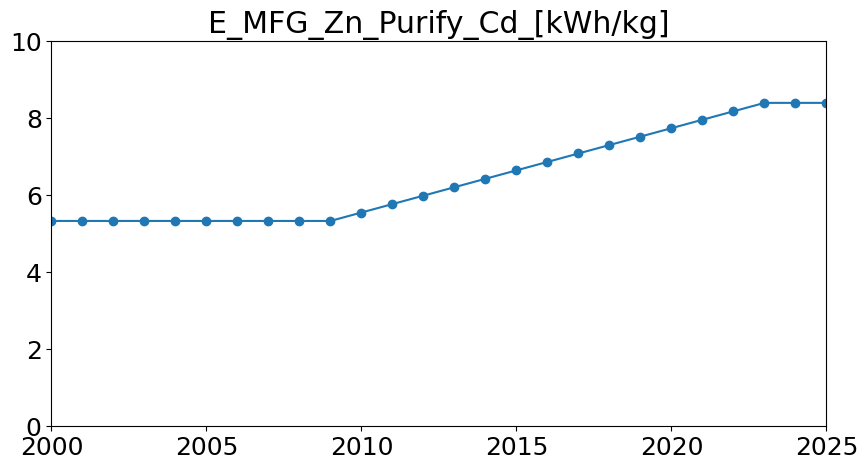

In [57]:
plt.plot(e_ZnRefine_filled.index, e_ZnRefine_filled.iloc[:,0], marker='o')
plt.xlim(2000,2025)
plt.ylim(0,10)
plt.title(e_ZnRefine_filled.columns[0])

#### Cadmium Electrowinning

In [58]:
e_CdRefine_raw.dropna(how='all')

,E_MFG_Cd_Purify_[kWh/kg],prct_Fuel,Source,Notes
year,,,,
2001,1.600000,0.0,"Malinowska, B., M. Rakib, and G. Durand. “Cadm...","electrolysis, 80% efficiency, is recovering Co..."
2002,1.210000,0.0,"Safarzadeh, Mohammad Sadegh, and Davood Moradk...","electrolytic specifc power consumption, others..."
2014,4.112222,0.0,"Baghban, Elaheh, Arjomand Mehrabani-Zeinabad, ...","Table 2, experimental and modeling, working wi..."
2015,2.820000,0.0,"Baghban, E., A. Mehrabani-Zeinabad, and A. Moh...","follow on experiment, has expression as a func..."
2018,3.216667,0.0,"Yadav, Deepak, and Rangan Banerjee. “A Compara...","Table 8, sensitivity analysis of hydrometallurgy"
2023,4.800000,0.0,"Elsayed, E. “The Role of Electrochemistry and ...","testing cathode design for water purification,..."


Text(0.5, 1.0, 'E_MFG_Cd_Purify_[kWh/kg]')

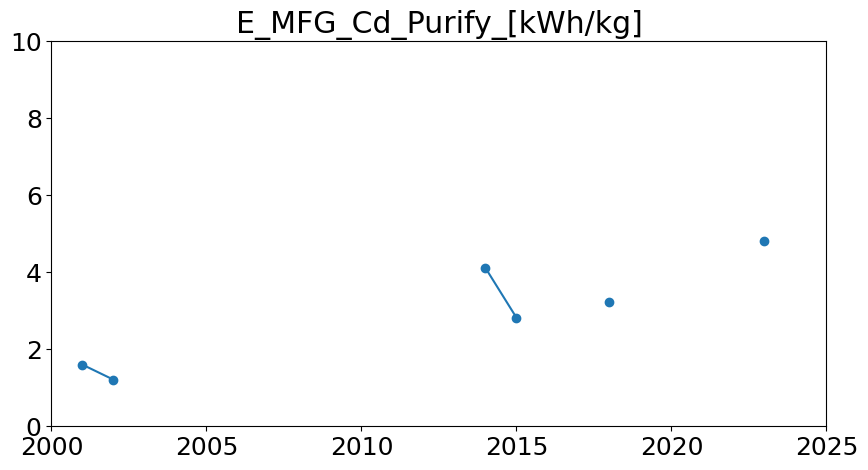

In [59]:
plt.plot(e_CdRefine_raw.index, e_CdRefine_raw.iloc[:,0], marker='o')
plt.xlim(2000,2025)
plt.ylim(0,10)
plt.title(e_CdRefine_raw.columns[0])

This looks like a trend, but its not. The high 2014 data point was actually working on equipment of a Zinc refining company in Australia. The first 2001 data point is actually for cobalt from CdS bath residues, but uses similar principles, but is likely too low, and the 2002 data point also indicates that it is lower than other reported values. 

If we drop the first 2 data points, and average the remaining, we get:

In [60]:
e_CdRefine = e_CdRefine_raw.iloc[10:,0].dropna(how='all').mean()
print(e_CdRefine,' kWh/kg')

3.73722222225  kWh/kg


This seems reasonable. Because this is done through electrolysis, we assume no fuel contribution. Now we add the two energies to refine Cadmium together.

In [61]:
#calculate fuel attributable energy
e_ZnRefine_filled['E_Fuel_[kWh/kg]'] = e_ZnRefine_filled.iloc[:,0]*(e_ZnRefine_filled.iloc[:,1]/100)

In [67]:
#Add Cd refine energy
e_ZnRefine_filled['E_ZnCdRefine_[kWh/kg]'] = e_ZnRefine_filled.iloc[:,0]+e_CdRefine
#calculate new % fuel
e_ZnRefine_filled['E_total_prctFuel_[%]'] = e_ZnRefine_filled['E_Fuel_[kWh/kg]']/e_ZnRefine_filled['E_ZnCdRefine_[kWh/kg]']*100
#downselect
e_CdTotalEnergy = round(e_ZnRefine_filled.iloc[:,3:],2)
e_CdTotalEnergy.head(2)

,E_ZnCdRefine_[kWh/kg],E_total_prctFuel_[%]
year,,
1995,9.07,39.39
1996,9.07,39.39


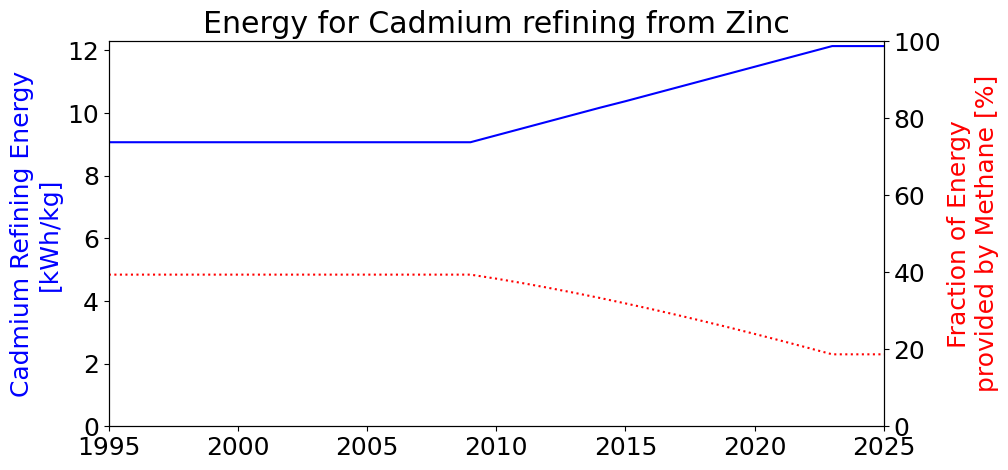

In [75]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('Cadmium Refining Energy\n[kWh/kg]', color='blue') 
ax1.plot(e_CdTotalEnergy.index,e_CdTotalEnergy.iloc[:,0], color='blue') 
ax1.set_ylim(0,)
ax1.set_xlim(1995,2025)

#right axis
ax2 = ax1.twinx()
plt.ylabel('Fraction of Energy\nprovided by Methane [%]', color='red')
ax2.plot(e_CdTotalEnergy.index,e_CdTotalEnergy.iloc[:,1], color='red', ls=':')  
ax2.set_ylim(0,100)

plt.title('Energy for Cadmium refining from Zinc')

plt.show()

In [76]:
e_CdTotalEnergy.to_csv(os.path.join(supportMatfolder,'output-energy-cadmiumMFGing.csv'))